**ANIMAL** **DETECTION**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import os

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Directory containing the dataset
data_dir = "/content/drive/MyDrive/dataset"

In [4]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # set validation split
train_generator = train_datagen.flow_from_directory(
      data_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode='categorical',
      subset='training')  # set as training data

validation_generator = train_datagen.flow_from_directory(
      data_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode='categorical',
      subset='validation')  # set as validation data










Found 240 images belonging to 6 classes.
Found 59 images belonging to 6 classes.


In [5]:
# Get class indices and create a mapping of indices to class names
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

In [6]:
# Load the MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Add custom top layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')])


In [8]:
# Freeze the base model
base_model.trainable = False

In [9]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 133s 7s/step - accuracy: 0.4700 - loss: 1.5496 - val_accuracy: 0.8475 - val_loss: 0.4820
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9302 - loss: 0.2265 - val_accuracy: 0.8814 - val_loss: 0.2547
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9691 - loss: 0.0929 - val_accuracy: 0.9661 - val_loss: 0.0928
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 0.9153 - val_loss: 0.2061
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9865 - loss: 0.0218 - val_accuracy: 0.9322 - val_loss: 0.1400
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9930 - loss: 0.0201 - val_accuracy: 0.9492 - val_loss: 0.0875
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9831 - val_loss: 0.0379
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0.9661 - val_loss: 0.0683
Epoch 9/10
8/8 ━━━

In [ ]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

In [ ]:
# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fine-tune the model
history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
8/8 [==============================] - 77s 8s/step - loss: 0.2602 - accuracy: 0.9000 - val_loss: 0.1063 - val_accuracy: 0.9492
Epoch 2/10
8/8 [==============================] - 57s 7s/step - loss: 0.1911 - accuracy: 0.9458 - val_loss: 0.1674 - val_accuracy: 0.9322
Epoch 3/10
8/8 [==============================] - 55s 7s/step - loss: 0.1879 - accuracy: 0.9208 - val_loss: 0.1623 - val_accuracy: 0.9153
Epoch 4/10
8/8 [==============================] - 56s 7s/step - loss: 0.1417 - accuracy: 0.9583 - val_loss: 0.2737 - val_accuracy: 0.9492
Epoch 5/10
8/8 [==============================] - 54s 6s/step - loss: 0.1236 - accuracy: 0.9625 - val_loss: 0.1078 - val_accuracy: 0.9661
Epoch 6/10
8/8 [==============================] - 60s 7s/step - loss: 0.0714 - accuracy: 0.9708 - val_loss: 0.1454 - val_accuracy: 0.9322
Epoch 7/10
8/8 [==============================] - 58s 7s/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.1911 - val_accuracy: 0.9661
Epoch 8/10
8/8 [==================

In [11]:
# Save the trained model
model.save("/content/drive/MyDrive/mobilenetv2_finetuned.h5")

In [ ]:
# Example code to load and predict with the trained model
# Load the model
model = tf.keras.models.load_model("/content/drive/MyDrive/mobilenetv2_finetuned.h5")

In [ ]:
# Define your class mapping based on your training
class_names = ["Bird", "Cat", "Dog", "Hamster", "Rabbit", "Turtle"]


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
def load_and_preprocess_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
    return image, image_array
def display_image_with_prediction(image, accuracy, predicted_class_name):
    plt.imshow(image)
    plt.title(f"Predicted class is: {predicted_class_name}")
    plt.axis('off')
    plt.show()
    print(f"Accuracy: {accuracy:.2f}%")
# Function to predict the class of an image
def predict_image_class(image_path):
    image, image_array = load_and_preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])
    accuracy = np.max(predictions[0]) * 100
    if accuracy >= 85.0:
       if predicted_class_index < len(class_names):
           predicted_class_name = class_names[predicted_class_index]
       else:
           predicted_class_name = "Out of classes"
       display_image_with_prediction(image, accuracy, predicted_class_name)
    else:
      print("image is rejected")




# Manually set the image path here
image_path = "/content/drive/MyDrive/porcupine.jpeg"
if os.path.isfile(image_path):
    predict_image_class(image_path)
else:
    print("Invalid image path. Please check the path and try again.")














1/1 [==============================] - 0s 56ms/step
image is rejected


In [ ]:
import requests
from PIL import Image
from io import BytesIO

In [ ]:
def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        image = Image.open(BytesIO(response.content))
        return image
    except Exception as e:
        print(f"Error downloading or opening image: {e}")
        return None


In [ ]:
# Function to display the image with prediction
def display_image_with_prediction(image, accuracy, predicted_class_name):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted class is: {predicted_class_name}")
    plt.show()
    print(f"Accuracy: {accuracy:.2f}%")





1/1 [==============================] - 1s 934ms/step


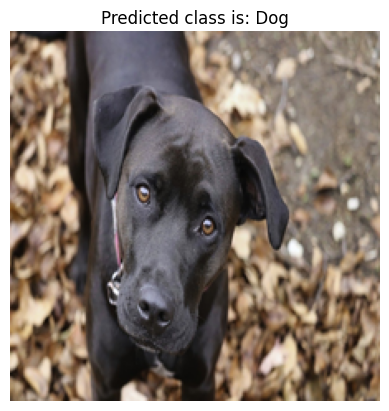

Accuracy: 99.47%


In [ ]:
image_url = "https://cdn.pixabay.com/photo/2023/08/23/03/33/boxer-8207572_1280.jpg"
# Download and preprocess the image
image = download_image(image_url)
if image is not None:
    image = image.resize((224, 224))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
    # Load the fine-tuned MobileNetV2 model
    model = tf.keras.models.load_model("/content/drive/MyDrive/mobilenetv2_finetuned.h5")
    # Define your class mapping based on your training
    class_names = ["Bird", "Cat", "Dog", "Hamster", "Rabbit", "Turtle"]
    # Make predictions

    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])
    accuracy = np.max(predictions[0]) * 100

    # Check if the predicted class name is within the range of class_names
    if predicted_class_index < len(class_names):
        predicted_class_name = class_names[predicted_class_index]
    else:
        predicted_class_name = "Out of classes"
     # Print and display the image, accuracy, and predicted class if accuracy is >= 85%
    if accuracy >= 85.00:
         display_image_with_prediction(image, accuracy, predicted_class_name)
    else:
        print("image rejected")
else:
    print("Failed to download or open the image.")











